# ***Error Handling, Logging, and Data Manipulation Assignment :-***

1. What is the difference between multithreading and multiprocessing?

    ANS:-  Multithreading and multiprocessing are two techniques used to     
    achieve concurrent execution in programs, but they differ in structure
    and use cases.

   * Multithreading:- involves multiple threads within a single process. These  threads share the same memory space and resources making communication between them efficient. It is best suited for I/O-bound tasks like file operations or network requests. However in languages like Python, the Global Interpreter Lock (GIL) restricts true parallel execution of threads, limiting performance gains in CPU-bound tasks.


    * Multiprocessing:- Uses multiple processes each with its own memory space  and Python interpreter. This allows true parallelism, making it ideal for CPU-bound tasks such as data processing or complex calculations. Since processes do not share memory, communication between them is more complex and typically requires inter-process communication (IPC) mechanisms like pipes or queues.

2. What are the challenges associated with memory management in Python?

    ANS:- Python uses a combination of `reference counting` and `garbage collection`. Reference counting tracks how many references point to an object when this count drops to zero the object is deallocated. However this system struggles with `circular references` where two or more objects reference each other preventing their memory from being freed. To address this Python includes a `cyclic garbage collector` which adds complexity and can introduce performance overhead if not tuned properly.
    
    
    Another challenge is `memory fragmentation` where memory becomes inefficiently used over time due to frequent allocations and deallocations. This can lead to increased memory usage even when the program does not need it. Python’s dynamic typing and object model also contribute to `higher memory consumption` as each object carries additional metadata.

3. Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [1]:
import logging

# Configure logging

logging.basicConfig(
    filename='error_log.txt',  # Log file name
    level=logging.ERROR,       # Log only errors and above
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def divide(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Attempted to divide by zero", exc_info=True)

divide(10, 0)

ERROR:root:Attempted to divide by zero
Traceback (most recent call last):
  File "/tmp/ipython-input-1574585326.py", line 13, in divide
    result = a / b
             ~~^~~
ZeroDivisionError: division by zero


4. Write a Python program that reads from one file and writes its content to
another file.

In [2]:
def copy_file(source_path, destination_path):
    try:
        with open(source_path, 'r') as source_file:
            content = source_file.read()

        with open(destination_path, 'w') as destination_file:
            destination_file.write(content)

        print(f"Content copied from '{source_path}' to '{destination_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: The file '{source_path}' was not found.")
    except IOError as e:
        print(f"IO error occurred: {e}")

# Example usage

copy_file('input.txt', 'output.txt')

Error: The file 'input.txt' was not found.


5. Write a program that handles both IndexError and KeyError using a
try-except block.

In [3]:
def handle_errors():
    my_list = [10, 20, 30]
    my_dict = {'a': 1, 'b': 2}

    try:
        # Trigger IndexError

        print("Accessing list element:", my_list[5])

        # Trigger KeyError

        print("Accessing dictionary key:", my_dict['z'])

    except IndexError:
        print("IndexError: List index is out of range.")
    except KeyError:
        print("KeyError: Key not found in dictionary.")


handle_errors()

IndexError: List index is out of range.


6.  What are the differences between NumPy arrays and Python lists?

    ANS:- NumPy arrays and Python lists differ mainly in structure, performance, and usage.

    * Python lists are general purpose containers that can hold elements of mixed data types, such as integers, strings, or even other lists. They are flexible and easy to use, making them suitable for everyday programming tasks. However lists are not memory efficient because each element stores additional type information. Operations like addition or multiplication require explicit loops or comprehensions, which makes them slower for numerical tasks.


    * NumPy arrays are specialized data structures designed for numerical and scientific computing. Unlike lists, they are homogeneous, meaning all elements must be of the same type, which allows them to store data in contiguous memory blocks. This design makes them more memory efficient and significantly faster for mathematical operations. NumPy arrays support vectorized operations, broadcasting, and advanced mathematical functions without explicit loops. They can easily handle multi-dimensional data, making them ideal for linear algebra, statistics, and large datasets.

7. Explain the difference between apply() and map() in Pandas.

    ANS:- In Pandas `map()` and `apply()` differ in scope and flexibility. `map()` is limited to Series objects and performs element wise operations by applying a function, dictionary, or mapping to each value. It is best suited for simple transformations. In contrast, `apply()` works on both Series and DataFrames allowing functions to be applied along an axis-row-wise or column-wise. This makes it more versatile, supporting complex operations, aggregations, and custom logic. While `map()` is efficient for straightforward element level tasks `apply()` is preferred for broader, axis-based computations across Pandas structures, offering greater flexibility in data manipulation and analysis.


8. Create a histogram using Seaborn to visualize a distribution.

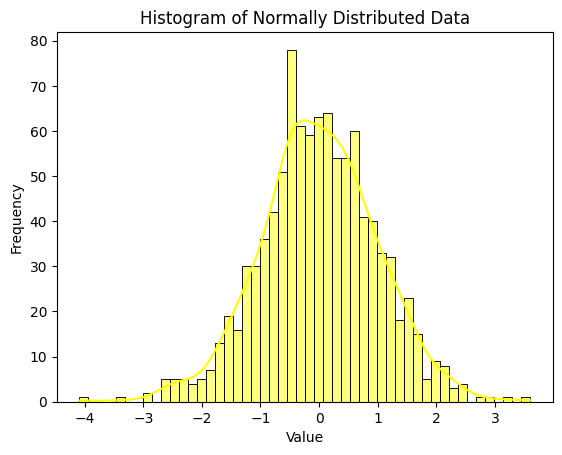

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data (normal distribution)

data = np.random.randn(1000)

# Create histogram with Seaborn

sns.histplot(data, bins=50, kde=True, color='yellow')

# Add labels and title

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")

plt.show()

9.  Use Pandas to load a CSV file and display its first 5 rows.

In [8]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')   # adjust path if needed
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Check the path and filename.")
except pd.errors.ParserError:
    print("Error: File could not be parsed. Check delimiter or encoding.")

Error: File not found. Check the path and filename.


10.  Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.

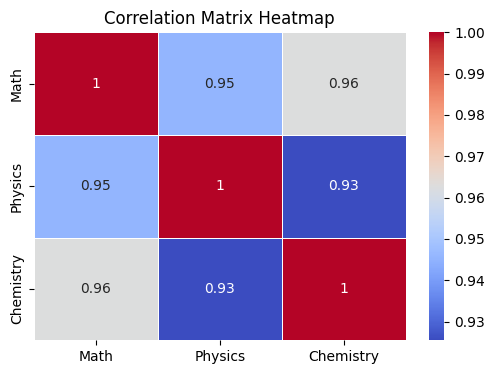

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame

data = {
    'Math': [88, 92, 80, 89, 100, 67, 78, 85],
    'Physics': [84, 94, 76, 88, 95, 65, 77, 90],
    'Chemistry': [86, 90, 82, 85, 99, 70, 75, 88]
}

df = pd.DataFrame(data)

# Calculate correlation matrix

corr_matrix = df.corr()

# Plot heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()